# Week 20: Natural Language Processing
### February 10, 2022

**1.	Write a python program (not a Jupyter notebook, but a py file you run from the command line) that accepts the cats_txt.txt file as input and counts the frequency of all words and punctuation in that text file, ordered by frequency. Make sure to handle capital and lowercase versions of words and count them together.**

Completed in VScode. Code in repo. Screen shots in readme file

**2.	Document how to run the program you created in question 1 in a readme.md file in your repo. Be as clear as possible. Use proper markdown, and consider using screenshots. Be sure to briefly discuss why this kind of exercise might be helpful for NLP in your markdown.** 

Information in readme file

### In a Jupyter notebook: 

**3.	Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.html . Stem or lemmatize the words and find counts. Select the top 20 words and create a histogram. Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list or top words, alter your logic to exclude them. Specify why you chose stemming or lemmatization.** 

In [1]:
# Import libraries
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get words from Paradise lost
lost_words = nltk.corpus.gutenberg.words('milton-paradise.txt')
# View the first few words
print(lost_words)

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]


Before diving in, I wanted to apply *both* lemmatization and stemming to a subset of words. I wanted to print those results and compare them to the original. This helps provide a better sense of their differences.

I experimented with a few different subsets of text. I decided to use the stemmer because (as the same suggests) this was shortening more words to their base (for example, "heavenly" to "heaven"). Contrastingly, the lemmatizer was keeping the full word, including capitalization. When it comes to the analysis of top 20 words, I am personally not as interested in the nuance that lemmatizing provides. I would rather see the base meaning of the word (i.e. I want words like "heavenly" and "heaven" to count the same). 

In [18]:
# Instantiate the word lemmatizer
lemmatizer = WordNetLemmatizer()
# Instantiate the word stemmer
stemmer = SnowballStemmer(language='english')

In [19]:
# Create a subset of words to run some code and see what it looks like
sub = lost_words[50:100]
print(sub)
# See how lemmatizer works
sub_lem = [lemmatizer.lemmatize(word) for word in sub]
print(sub_lem)
# See how stemmer works
sub_stem = [stemmer.stem(word) for word in sub]
print(sub_stem)

['and', 'regain', 'the', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', 'that', ',', 'on', 'the', 'secret', 'top', 'Of', 'Oreb', ',', 'or', 'of', 'Sinai', ',', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'In', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'Rose', 'out', 'of', 'Chaos', ':', 'or', ',', 'if']
['and', 'regain', 'the', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', 'that', ',', 'on', 'the', 'secret', 'top', 'Of', 'Oreb', ',', 'or', 'of', 'Sinai', ',', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'In', 'the', 'beginning', 'how', 'the', 'heaven', 'and', 'earth', 'Rose', 'out', 'of', 'Chaos', ':', 'or', ',', 'if']
['and', 'regain', 'the', 'bliss', 'seat', ',', 'sing', ',', 'heaven', 'muse', ',', 'that', ',', 'on', 'the', 'secret', 'top', 'of', 'oreb', ',', 'or', 'of', 'sinai', ',', 'didst', 'inspir', 'that', 'shepherd', 'who', 'first', 'ta

Now, I will apply stemming to all of the words in Paradise Lost, rather than just the subset. In order to do that, I will first need to lowercase all of the words, ensure everything is alpha (not numeric), and then remove the stop words.

In [44]:
# List of additional stop words that I want to remove from analysis
old_english = ['thou', 'thy', 'thee', 'thus', 'shall', 'yet', 'though', 'may', 'till']

In [46]:
# Ensure everything is lower case
lost_low = [word.lower() for word in lost_words]

# Ensure everything is alpha only
lost_alpha = [word for word in lost_low if word.isalpha()]

# Define the stop words
english_stops = set(nltk.corpus.stopwords.words('english'))

# Remove the stop words
lost_stop = [word for word in lost_alpha if word not in english_stops and word not in old_english]

# Iterate through the entire text and stem the words in a new list called "lost_stem"
lost_stem = [stemmer.stem(word) for word in lost_stop]

# Count all of the words
lost_count = Counter(lost_stem)

# Print the 20 most common words
lost20 = lost_count.most_common(20)
print(lost20)

[('heaven', 485), ('god', 316), ('earth', 228), ('us', 187), ('man', 178), ('first', 175), ('high', 159), ('day', 157), ('one', 142), ('power', 133), ('like', 132), ('son', 132), ('great', 130), ('far', 129), ('death', 127), ('world', 122), ('light', 122), ('good', 122), ('hell', 119), ('night', 117)]


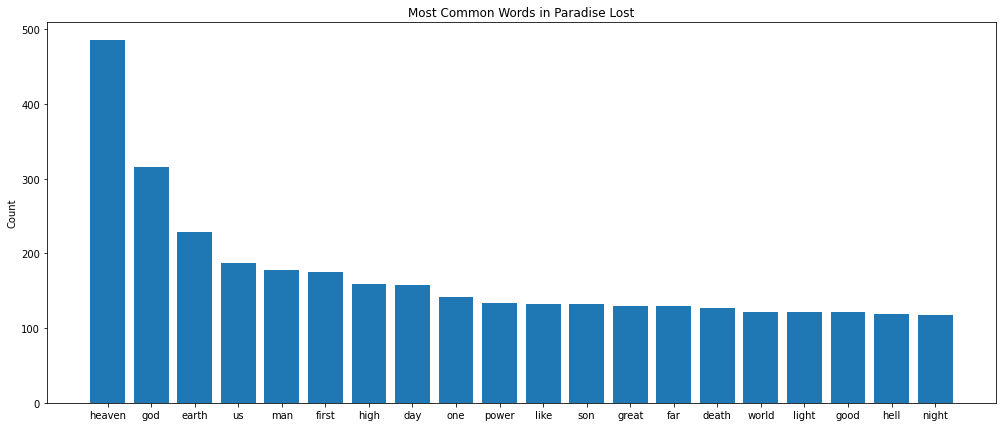

In [57]:
# Unpack the tuples
word, count = zip(*lost20)

# Set up figure size
fig = plt.figure(figsize = (17,7))
# Plot word and count
plt.bar(word, count)
# Set up the labels
plt.xlabel('')
plt.ylabel('Count')
plt.title('Most Common Words in Paradise Lost')
# Show plot
plt.show()

**4.	Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost*. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run.** 

First, I need to extract all of the sentences from Paradise Lost. The output will be a list of lists. Each sub-list will contain words/"tokens" which comprise one sentence. 

In [2]:
# Get sentences from Paradise lost
lost_sents = nltk.corpus.gutenberg.sents('milton-paradise.txt')
# Print only the first few sentences as a test
print(lost_sents[:10])

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ['Of', 'Man', "'", 's', 'first', 'disobedience', ',', 'and', 'the', 'fruit', 'Of', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'into', 'the', 'World', ',', 'and', 'all', 'our', 'woe', ',', 'With', 'loss', 'of', 'Eden', ',', 'till', 'one', 'greater', 'Man', 'Restore', 'us', ',', 'and', 'regain', 'the', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', 'that', ',', 'on', 'the', 'secret', 'top', 'Of', 'Oreb', ',', 'or', 'of', 'Sinai', ',', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'In', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'Rose', 'out', 'of', 'Chaos', ':', 'or', ',', 'if', 'Sion', 'hill', 'Delight', 'thee', 'more', ',', 'and', 'Siloa', "'", 's', 'brook', 'that', 'flowed', 'Fast', 'by', 'the', 'oracle', 'of', 'God', ',', 'I', 'thence', 'Invoke', 'thy', 'aid', 'to', 'my', 'adventurous', 'song',

In order to properly analyze the sentences, we will need to paste the tokens back together. To do this, I need to iterate through the lists, join words together, and then remove the unwanted spaces. I will then append this to a *new* list. The *new* list will still be a giant list of lists. But each list will contain full *sentences,* rather than individual words.

In [3]:
# Put the words back into actual sentences

# Empty list to append to
sentence_list = []    

# Iterate through the lists within sentences
for i, word_list in enumerate(lost_sents):
    # Concatenate the words together and remove spaces from punctuation
    sentence = ' '.join(word_list).replace(' , ', ', ').replace(' : ', ': ').replace(" ' ", "'").replace(" ,'", ",'").replace(' ?', "?").replace(' .', '.').replace(' ;', ';').replace(" !", '!').replace('( ', '(').replace(' )', ')')
    # append them to our empty list as a list (list of lists)
    sentence_list.append([sentence])

In [4]:
# View a sample sentence
print(sentence_list[2])

["Of Man's first disobedience, and the fruit Of that forbidden tree whose mortal taste Brought death into the World, and all our woe, With loss of Eden, till one greater Man Restore us, and regain the blissful seat, Sing, Heavenly Muse, that, on the secret top Of Oreb, or of Sinai, didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos: or, if Sion hill Delight thee more, and Siloa's brook that flowed Fast by the oracle of God, I thence Invoke thy aid to my adventurous song, That with no middle flight intends to soar Above th'Aonian mount, while it pursues Things unattempted yet in prose or rhyme."]


In [6]:
# For code-testing purposes, extract a slice of sentences to view
sample = sentence_list[:101]

Now that I have the complete sentences, I can run the sentiment analysis! I will have to iterate through all of the sentences. While doing so, I will calculate the polarity score and append it to yet another list! The "sentiments" list will contain all of the polarity scores from each individual sentence. The output of "sentiments" will be one giant list of lists. And each nested list will contain a *dictionary* with the polarity results. 

In [16]:
# Instantiate the sentiment analyzer
sent = SentimentIntensityAnalyzer()

# Where we will append our sentiments
    # This will end up being a list of lists that each contain a dictionary...
sentiment_list = []

# iterate through the sample:
# real deal now! Change sample to sentence_list
for i, s in enumerate(sentence_list):
    # list comprehension to get polarity scores for every sentence in the sample
    polarity = [sent.polarity_scores(s) for s in sentence_list[i]]
    # append the scores to the empty sentiment list
    sentiment_list.append(polarity)

To create a data frame, I need to transform my list of lists (with dictionaries) into *just* a list of dictionaries. Code below.

In [19]:
# We need to make this ONE list of dictionaries, rather than nested lists...

# append dictionaries here
dct_list = []

# Iterate through the list of lists of dictionaries
for score in sentiment_list:
    # extract only the dictionaries from each list
    for dct in score:
        # append the dictionaries to new list
        dct_list.append(dct)

# Now, we can convert the dictionaries to a data frame
polarity_df = pd.DataFrame(dct_list)
# View sample data frame
polarity_df.head()

,neg,neu,pos,compound
0,0.219,0.381,0.400,0.4404
1,0.000,1.000,0.000,0.0000
2,0.117,0.689,0.194,0.8885
3,0.054,0.771,0.175,0.8546
4,0.093,0.668,0.239,0.8689


Finally, I will sort the polarity data frame by positive values (descending), so that we find the most positive results. I will limit the results to only 5. I will then extract the index and transform that into a list so that we can later use it for iterating. I'll repeat this for the negative and neutral columns as well. 

In [27]:
# Find the top 5 most positive lists
pos_list = polarity_df.sort_values('pos', ascending=False).head(5).index.tolist()
print(pos_list)

print(polarity_df.sort_values('pos', ascending=False).head(5))

[605, 1441, 908, 828, 1233]
      neg    neu    pos  compound
605   0.0  0.000  1.000    0.5255
1441  0.0  0.000  1.000    0.5562
908   0.0  0.000  1.000    0.5255
828   0.0  0.000  1.000    0.5562
1233  0.0  0.162  0.838    0.9381


In [28]:
# Find the top 5 most negatives lists
neg_list = polarity_df.sort_values('neg', ascending=False).head(5).index.tolist()
print(neg_list)

print(polarity_df.sort_values('neg', ascending=False).head(5))

[153, 512, 1689, 478, 175]
        neg    neu  pos  compound
153   1.000  0.000  0.0   -0.3595
512   1.000  0.000  0.0   -0.7088
1689  1.000  0.000  0.0   -0.3382
478   0.777  0.223  0.0   -0.5411
175   0.772  0.228  0.0   -0.5255


In [29]:
# Find the top 5 most neutral lists
neu_list = polarity_df.sort_values('neu', ascending=False).head(5).index.tolist()
print(neu_list)

print(polarity_df.sort_values('neu', ascending=False).head(5))

[1850, 515, 555, 550, 1398]
      neg  neu  pos  compound
1850  0.0  1.0  0.0       0.0
515   0.0  1.0  0.0       0.0
555   0.0  1.0  0.0       0.0
550   0.0  1.0  0.0       0.0
1398  0.0  1.0  0.0       0.0


Now, use the above index values to extract the corresponding sentences from Paradise Lost.

**Most Positive Sentences in Paradise Lost**

In [24]:
# Positive sentences
for i in pos_list:
    print(sentence_list[i])

['O friends!']
['O Heaven!']
['O Friends!']
['O Heaven!']
['She fair, divinely fair, fit love for Gods!']


**Most Negative Sentences in Paradise Lost**

In [25]:
# Negative sentences
for i in neg_list:
    print(sentence_list[i])

['No!']
['O Hell!']
['Alas!']
['Me miserable!']
['Sad cure!']


**Most Neutral Sentences in Paradise Lost**

In [26]:
# Neutral sentences
for i in neu_list:
    print(sentence_list[i])

['[ The End ]\x1a\x1a']
['Ah!']
['When Adam thus to Eve.']
['To whom the winged warriour thus returned.']
['Hadst thou been firm and fixed in thy dissent, Neither had I transgressed, nor thou with me.']


**5.	Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not.** 

*you can pick another book in the Gutenberg Corpus if you’re feeling adventurous or curious.* 

*Positive:*

The first 4 sentences were 100% positive and the last was 84%. I am not at all surprised by the results of the first 4 sentences. This is because they were each extremely short, consisting of only two words (e.g. 'O' friends!'). Moreover, the specific words (friends and heaven) both have very positive connotations in the English language. So on their own, it makes sense that the whole sentence would be 100% positive. The last sentence, "She fair, divinely fair, fit love for Gods!" is also quite positive. "fair," "love," "divine," and "Gods," all have positive connotations in the English language, and the other words in the sentence are fairly neutral. Overall, unsurprising results. 

*Negative:*

The first 3 sentences were 100% negative and the last two were 78% and 77%, respectively. Similarly to the positive results, the negative results comprised of extremely brief sentences. The first two, "No!" and "O' Hell!" are both firmly negative statements, so the 100% negative is unsurprising. Likewise, "Alas!" on its own would have a negative sentiment as well. I am surprised that the last statement "sad cure!" was in the top 5. "Sad" is clearly a negative word, but "cure" is quite positive. Considering there are only two words, I wouldn't have thought that "sad" would have had as strong of a weight. So that was interesting.  

*Neutral:*

All 4 sentences were 100% neutral. This result was definitely the most surprising to me! The first 3 sentences are fairly neutral, so that part makes sense. The 4th sentence contains "winged" (which could arguably be positive) and "warriour" (which could be negative or positive, depending on the context). As a whole, the sentence *does* feel fairly neutral, but I am just surprised it is 100%. The 4th sentence definitely does not seem neutral to me, so I am very surprised by that result. I wonder if the sentiment analysis does not do as well with old English, and perhaps that hinders the results. 

## Data Camp Certification
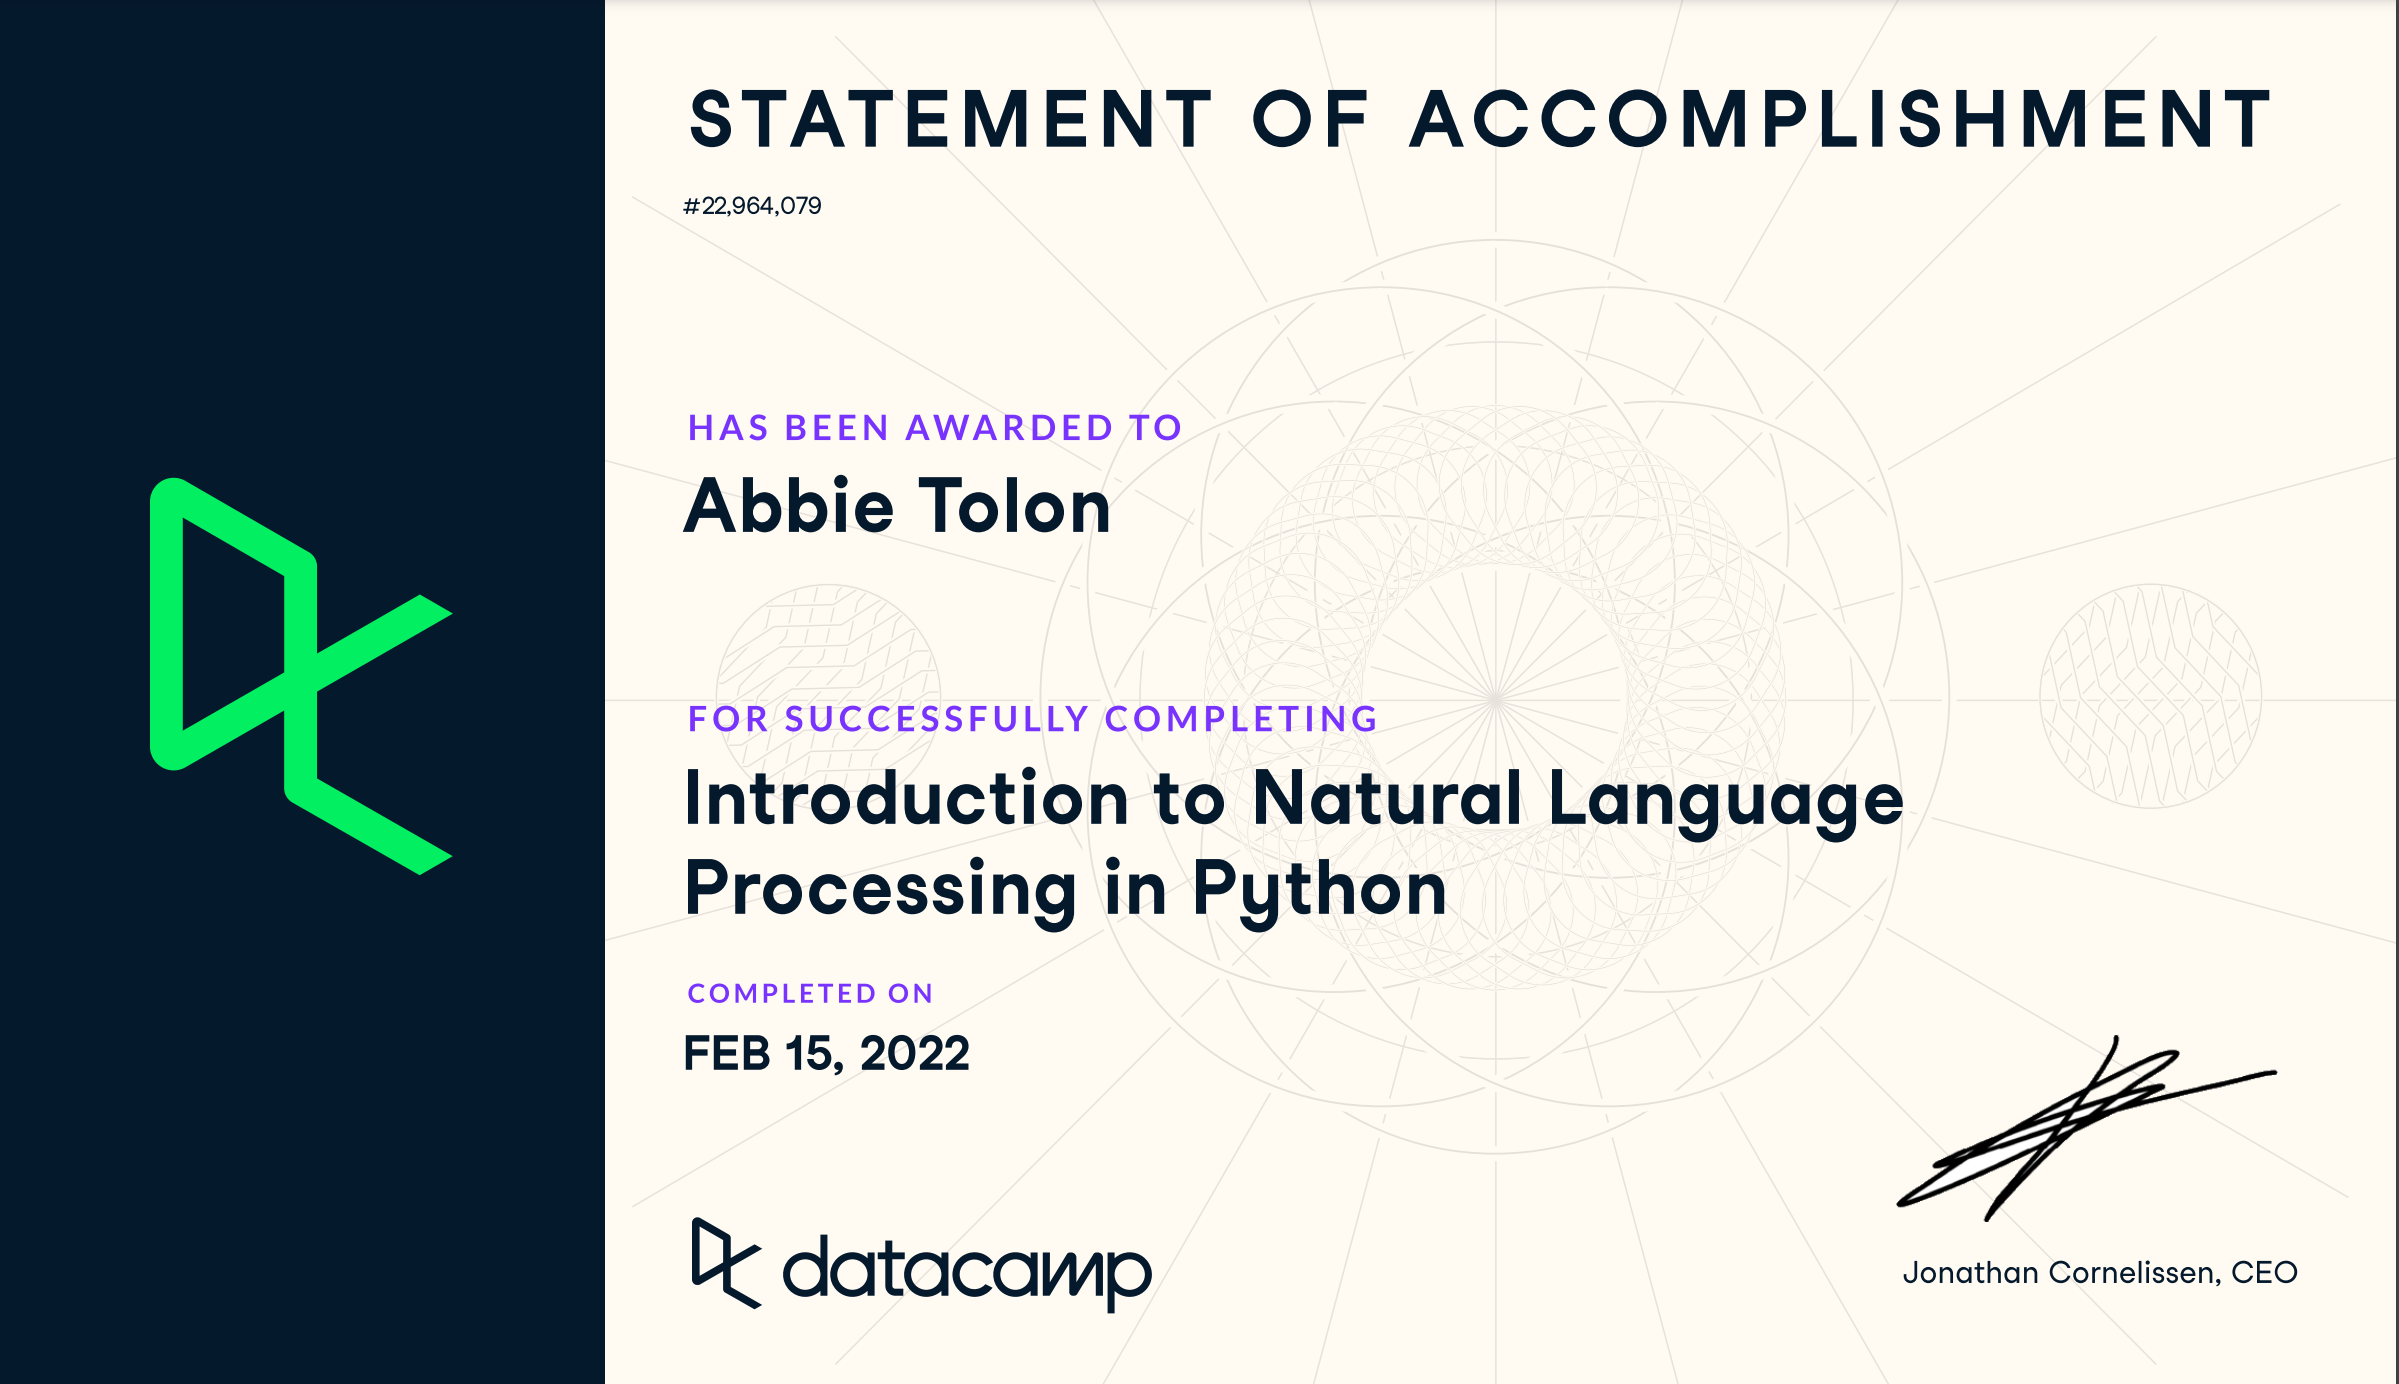